In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [47]:
read_dir='E:/文档/认知诊断/正文/'
data=pd.read_csv(read_dir+'alpha敏感度实验结果.csv').set_index(['dataSet','alpha'])
data

counter   obj_acc   obj_auc  obj_rmse   obj_mae  sub_rmse  \
dataSet     alpha                                                              
FrcSub      2            0  0.830224  0.882324  0.363410  0.252689       NaN   
            2            1  0.829757  0.882950  0.363106  0.252512       NaN   
            2            2  0.829757  0.882710  0.363183  0.252425       NaN   
            2            3  0.831157  0.883285  0.363055  0.252065       NaN   
            2            4  0.829291  0.882966  0.362847  0.251891       NaN   
...                    ...       ...       ...       ...       ...       ...   
ASSIST_2017 8            0  0.730494  0.802844  0.422522  0.357021       NaN   
            8            1  0.730106  0.802374  0.422788  0.357030       NaN   
            8            2  0.731141  0.802547  0.422656  0.356891       NaN   
            8            3  0.730825  0.802504  0.422737  0.357201       NaN   
            8            4  0.730580  0.802774  0.422583  0.356713       NaN   

                   sub_mae  
dataSet     alpha           
FrcSub      2          NaN  
            2          NaN  
            2          NaN  
            2          NaN  
            2          NaN  
...                    ...  
ASSIST_2017 8          NaN  
            8          NaN  
            8          NaN  
            8          NaN  
            8          NaN  

[175 rows x 7 columns]

In [48]:
data.loc[[['FrcSub',2]],:]

counter   obj_acc   obj_auc  obj_rmse   obj_mae  sub_rmse  \
dataSet alpha                                                              
FrcSub  2            0  0.830224  0.882324  0.363410  0.252689       NaN   
        2            1  0.829757  0.882950  0.363106  0.252512       NaN   
        2            2  0.829757  0.882710  0.363183  0.252425       NaN   
        2            3  0.831157  0.883285  0.363055  0.252065       NaN   
        2            4  0.829291  0.882966  0.362847  0.251891       NaN   

               sub_mae  
dataSet alpha           
FrcSub  2          NaN  
        2          NaN  
        2          NaN  
        2          NaN  
        2          NaN

In [49]:
dataSet_list=['FrcSub', 'Math1', 'Math2', 'ASSIST_0910', 'ASSIST_2017']
alpha_list=[2, 3, 4, 5, 6, 7, 8]
all_columns = ['obj_acc', 'obj_auc', 'obj_rmse', 'obj_mae', 'sub_rmse', 'sub_mae']


mean_data=pd.DataFrame(columns=['dataSet','alpha']+all_columns)

counter=0
for dataSet in dataSet_list:
    for alpha_value in alpha_list:
        mean_data.loc[counter,['dataSet','alpha']]=[dataSet,alpha_value]
        now_data=data.loc[[[dataSet,alpha_value]],all_columns]
        mean_data.loc[counter,all_columns]=now_data.mean(axis=0)
        counter+=1

mean_data=mean_data.set_index('dataSet')

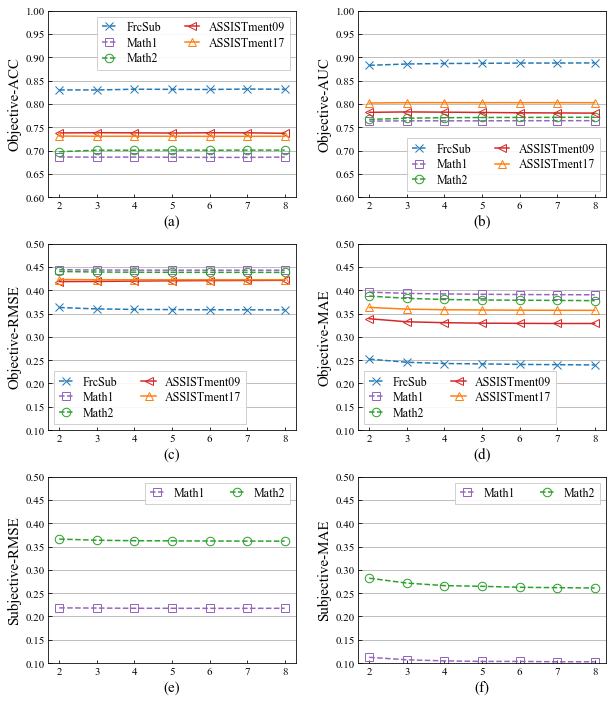

In [50]:
ylim_list=[(0.6,1.0),(0.6,1.0),(0.1,0.5),(0.1,0.5),(0.1,0.5),(0.1,0.5)]
line_style=['--x','--s','--o','-<','-^']
color_list=['#2279b5','#9467bd','#2ca02c','#d62728','#ff7f0f']
legend_loc_list=['upper right','lower right','best','lower left','upper right','upper right']
dataSet_rename_list=['FrcSub', 'Math1', 'Math2', 'ASSISTment09', 'ASSISTment17']
ylabels=['Objective-ACC','Objective-AUC','Objective-RMSE',
         'Objective-MAE','Subjective-RMSE','Subjective-MAE']
xlabels=['(a)','(b)','(c)','(d)','(e)','(f)']
markersize=8.5

# 坐标轴的刻度设置向内(in)或向外(out)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#建立画布 figsize,它用width和height来控制画布的宽和高
fig, ax=plt.subplots(figsize=(10,12)) #facecolor='red'设置画布颜色
plt.subplots_adjust(wspace=0.25,hspace=0.25)
for i in range(4):
    plt.subplot(3,2,i+1)#表示将图标的整个区域分成2行2列在第一个坐标系里面绘图
    for j,dataSet in enumerate(dataSet_list):
        now_data=mean_data.loc[dataSet,['alpha',all_columns[i]]].dropna()
        plt.plot(now_data['alpha'],now_data[all_columns[i]],line_style[j],color=color_list[j],
         markerfacecolor='none',markersize=markersize)
        plt.ylabel(ylabels[i],fontdict={'family':'Times New Roman', 'size': 15})
        plt.xlabel(xlabels[i],fontdict={'family':'Times New Roman', 'size': 15})
        plt.yticks(fontproperties = 'Times New Roman', size = 11)
        plt.xticks(fontproperties = 'Times New Roman', size = 11)
        plt.legend(dataSet_rename_list,framealpha=0.9,ncol=2,labelspacing=0.3,
          handlelength=1.2,fancybox=False,loc=legend_loc_list[i],
          prop={'family':'Times New Roman', 'size': 12})
        plt.grid(axis='y',linestyle = '-',zorder=0)
        plt.ylim(ylim_list[i])

for i in range(2):
    plt.subplot(3,2,i+5)#表示将图标的整个区域分成2行2列在第一个坐标系里面绘图
    for j,dataSet in enumerate(['Math1','Math2']):
        now_data=mean_data.loc[dataSet,['alpha',all_columns[i+4]]].dropna()
        plt.plot(now_data['alpha'],now_data[all_columns[i+4]],line_style[j+1],color=color_list[j+1],
         markerfacecolor='none',markersize=markersize)
        plt.ylabel(ylabels[i+4],fontdict={'family':'Times New Roman', 'size': 15})
        plt.xlabel(xlabels[i+4],fontdict={'family':'Times New Roman', 'size': 15})
        plt.yticks(fontproperties = 'Times New Roman', size = 11)
        plt.xticks(fontproperties = 'Times New Roman', size = 11)
        plt.legend(['Math1','Math2'],framealpha=0.9,ncol=2,labelspacing=0.3,
          handlelength=1.2,fancybox=False,loc=legend_loc_list[i+4],
          prop={'family':'Times New Roman', 'size': 12})
        plt.grid(axis='y',linestyle = '-',zorder=0)
        plt.ylim(ylim_list[i+4])

plt.savefig('E:/文档/认知诊断/正文/fig3.jpg',dpi=1200,bbox_inches='tight')
plt.show()